# Classifier


In [85]:
# 0) importing our libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

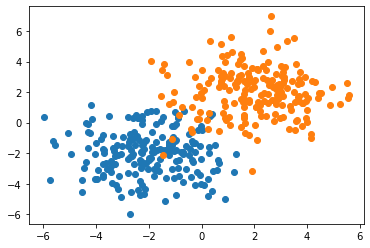

In [86]:
# 1) Creating our dataset
n_samples = 400
centers = np.array([[-2.0, -2.0], [2.0, 2.0]])
X, Y = datasets.make_blobs(n_samples=n_samples, 
                           centers=centers,
                           cluster_std=1.5,
                           random_state=11
                           )
x_data = torch.Tensor(X)
y_data = torch.Tensor(Y.reshape(n_samples, 1))

plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
plt.show()

In [87]:
# 2) Building our model 
class Classifier(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x): 
        pred = torch.sigmoid(self.linear(x))
        return pred
    
    def prediction(self, x):
        if self.forward(x) > 0.5:
            return 1
        else:
            return 0
        
model = Classifier(2, 1)
print(model)

Classifier(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


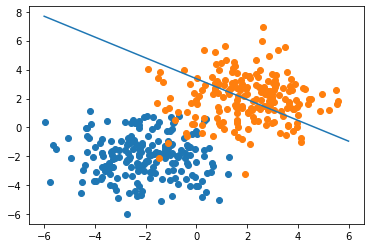

In [88]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
w1 = w1.item()
w2 = w2.item()
b = b.item()
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
input_x1 = np.array([-6, 6])
input_x2 = (w1*input_x1 + b) / (-w2)
plt.plot(input_x1, input_x2)
plt.show()

In [89]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [91]:
# 3) Train our model 
epochs = 1024
losses = []
for e in range(epochs):
    preds = model.forward(x_data)
    loss = criterion(preds, y_data)
    
    losses.append(loss.item())
    print("epoch : ", e, ", loss : ", loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch :  0 , loss :  1.0269778966903687
epoch :  1 , loss :  1.0236071348190308
epoch :  2 , loss :  1.020250678062439
epoch :  3 , loss :  1.0169082880020142
epoch :  4 , loss :  1.0135802030563354
epoch :  5 , loss :  1.0102659463882446
epoch :  6 , loss :  1.0069661140441895
epoch :  7 , loss :  1.0036799907684326
epoch :  8 , loss :  1.0004081726074219
epoch :  9 , loss :  0.9971501231193542
epoch :  10 , loss :  0.9939062595367432
epoch :  11 , loss :  0.9906761050224304
epoch :  12 , loss :  0.9874599575996399
epoch :  13 , loss :  0.9842574596405029
epoch :  14 , loss :  0.9810688495635986
epoch :  15 , loss :  0.9778941869735718
epoch :  16 , loss :  0.974733293056488
epoch :  17 , loss :  0.9715859293937683
epoch :  18 , loss :  0.9684523940086365
epoch :  19 , loss :  0.9653323888778687
epoch :  20 , loss :  0.9622260332107544
epoch :  21 , loss :  0.9591333270072937
epoch :  22 , loss :  0.9560540914535522
epoch :  23 , loss :  0.9529882669448853
epoch :  24 , loss :  0.9499

epoch :  722 , loss :  0.281261146068573
epoch :  723 , loss :  0.28102734684944153
epoch :  724 , loss :  0.28079405426979065
epoch :  725 , loss :  0.2805613577365875
epoch :  726 , loss :  0.28032922744750977
epoch :  727 , loss :  0.2800975739955902
epoch :  728 , loss :  0.2798665165901184
epoch :  729 , loss :  0.2796359360218048
epoch :  730 , loss :  0.27940598130226135
epoch :  731 , loss :  0.2791765332221985
epoch :  732 , loss :  0.2789475619792938
epoch :  733 , loss :  0.2787191867828369
epoch :  734 , loss :  0.2784913182258606
epoch :  735 , loss :  0.27826398611068726
epoch :  736 , loss :  0.2780371904373169
epoch :  737 , loss :  0.2778109312057495
epoch :  738 , loss :  0.27758514881134033
epoch :  739 , loss :  0.27735987305641174
epoch :  740 , loss :  0.2771352231502533
epoch :  741 , loss :  0.2769109904766083
epoch :  742 , loss :  0.276687353849411
epoch :  743 , loss :  0.27646419405937195
epoch :  744 , loss :  0.2762415409088135
epoch :  745 , loss :  0.276

0.45406728982925415 0.41962289810180664 0.46466493606567383


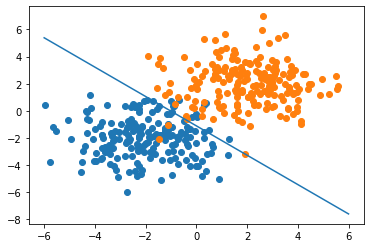

In [95]:
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
[w, b] = model.parameters()
w1, w2 = w.view(2)
w1 = w1.item()
w2 = w2.item()
b = b.item()
input_x1 = np.array([-6, 6])
input_x2 = (w1*input_x1 + b) / (-w2)
plt.plot(input_x1, input_x2)
print(w1, w2, b)

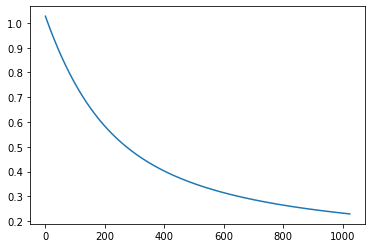

In [96]:
plt.plot(range(epochs), losses)

1
0


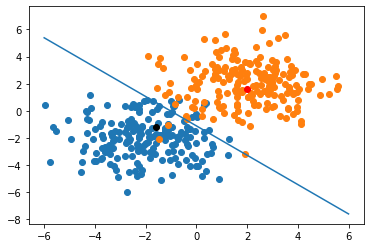

In [111]:
# 4) Testting
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
[w, b] = model.parameters()
w1, w2 = w.view(2)
w1 = w1.item()
w2 = w2.item()
b = b.item()
input_x1 = np.array([-6, 6])
input_x2 = (w1*input_x1 + b) / (-w2)
plt.plot(input_x1, input_x2)


point1 = torch.Tensor([2.0, 1.6])
point2 = torch.Tensor([-1.6, -1.2])
print(model.prediction(point1))
print(model.prediction(point2))

plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
